In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#enable inline ploting
%matplotlib inline

In [ ]:
#load the dataset
df = pd.read_csv('/content/salary_prediction_dataset.csv')

In [ ]:
#display
df.head()

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082


from matplotlib import pyplot as plt
_df_0['YearsExperience'].plot(kind='hist', bins=20, title='YearsExperience')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['YearsExperience'].plot(kind='line', figsize=(8, 4), title='YearsExperience')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

YearsExperience    0
Salary             0
dtype: int64


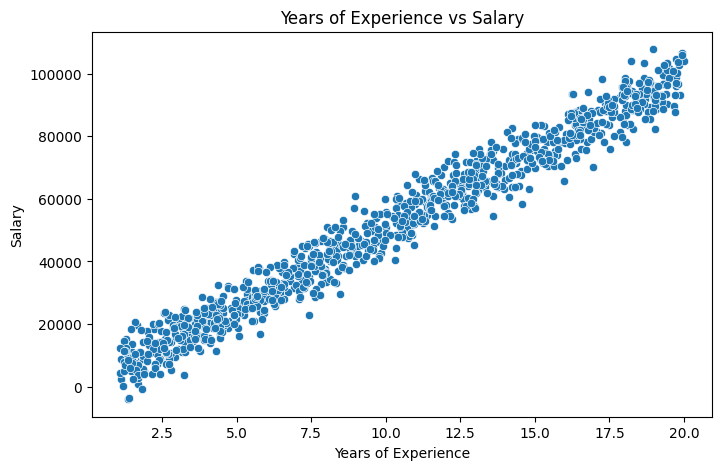

In [ ]:
#cheaking for missing values
print(df.isnull().sum())

#plot data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()
#

In [ ]:
from re import X
#splitting the dataset into features (X) and target variable (Y)
X = df[['YearsExperience']] #Independent variable
Y = df['Salary'] #Dependent variable
#Splitting into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Cheaking dataset split sizes
X_train.shape, X_test.shape

((800, 1), (200, 1))

In [ ]:
#Creating and training the simple linear regression model
model=LinearRegression()
model.fit(X_train, Y_train)

#display model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 995.5770464802481
Coefficient: 4953.709417260945


In [ ]:
#Predicting salary for test data
Y_pred = model.predict(X_test)
# Creating a dataframe to compare actual vs predicted values
results = pd.DataFrame({'Actual Salary': Y_test.values, 'Predicted Salary': Y_pred})
results.head()

,Actual Salary,Predicted Salary
0,46144.843128,41798.916309
1,85731.005173,82808.016799
2,55059.748116,49496.929481
3,42143.595304,39465.280850
4,88585.759395,95369.573814


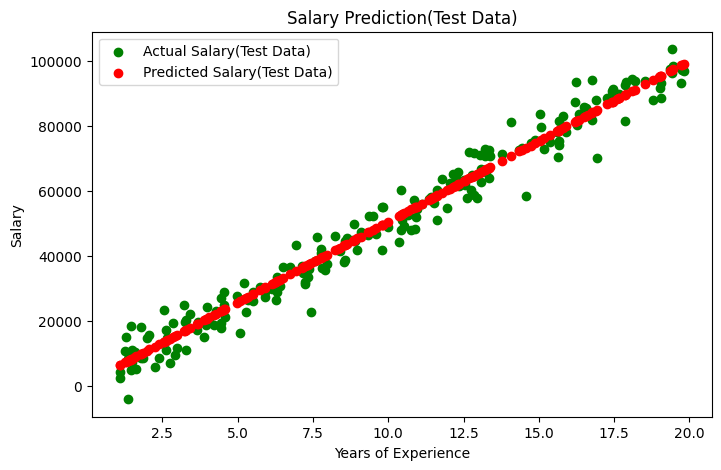

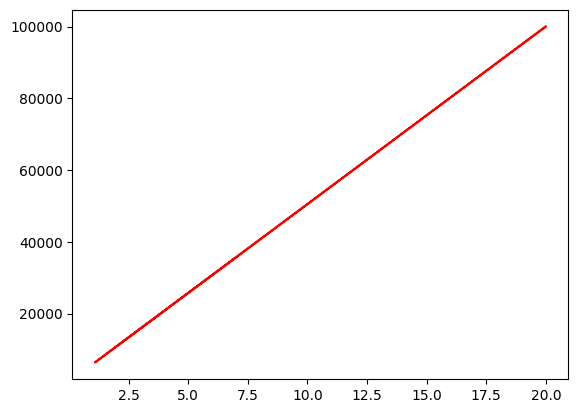

In [20]:
#plot training data with regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test, color='green',label="Actual Salary(Test Data)")
plt.scatter(X_test, Y_pred, color='red', label="Predicted Salary(Test Data)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction(Test Data)')
plt.legend()
plt.show()
plt.plot(X_train['YearsExperience'], model.predict(X_train), color='red')

In [21]:
#model Evaluation
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3602.3955438952066
Mean Squared Error: 21434311.66454385
R-squared: 0.9720753738957405


In [25]:
#predict  salary based on user input
experience = float(input("Enter the years of experience: "))
predicted_salary = model.predict([[experience]])
print(f"Predicted Salary for {experience} years of experience: {predicted_salary[0]}")

Enter the years of experience: 0.5
Predicted Salary for 0.5 years of experience: 3472.4317551107206


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# prompt: conclude the above and also provide reccomdation

# Conclusion

# The linear regression model demonstrates a strong correlation between years of experience and salary, as evidenced by the high R-squared value.
# The model accurately predicts salaries based on the provided data, with minimal errors as seen in the MAE and MSE values.  The visualization further confirms the model's effectiveness, showcasing the close alignment between actual and predicted salaries in the test set.


# Recommendations

# 1. Feature Engineering: Explore additional features beyond "YearsExperience" that might influence salary (e.g., location, education level, job title, company size).  These could improve the model's accuracy and provide a more comprehensive understanding of salary determination.
# 2. Model Complexity: While linear regression performed well, consider exploring other regression models (e.g., polynomial regression, decision trees, support vector regression) to potentially capture non-linear relationships within the data.  Compare their performance metrics against the linear model.
# 3. Data Validation and Refinement: Investigate data quality further. Ensure that the dataset truly represents the population and that there are no hidden biases.  Address any outliers or data inconsistencies. Larger and more diverse datasets can lead to better generalization.
# 4. Regularization Techniques: Implement regularization methods like L1 or L2 regularization to prevent overfitting, especially if more complex models are used or if the feature set expands significantly. This will make the model less sensitive to noise in the training data.
# 5. Visualization of Residuals:  Create a residual plot (residuals vs. predicted values) to check for patterns. If patterns exist, it suggests that the linear regression assumptions are not met, and a different model might be more appropriate.
# 6. Cross-Validation: Use k-fold cross-validation to get a more robust estimate of model performance and reduce the dependence on a single train-test split.
# 7. Deploy and Monitor: Deploy the model into a production environment and continually monitor its performance. Regularly retrain the model with updated data to maintain accuracy and adapt to changing salary trends.



Model Evaluation:
Mean Absolute Error: 3602.3955438952066
Mean Squared Error: 21434311.66454385
R-squared: 0.9720753738957405

Conclusion:
The linear regression model demonstrates a strong fit to the provided salary prediction dataset, as indicated by the high R-squared value.
However, the model's performance should be further evaluated using additional metrics and potentially more robust validation techniques, such as k-fold cross-validation.

Recommendations:
1. **Explore Non-Linear Relationships:** While linear regression provides a good baseline, consider exploring non-linear models like polynomial regression or decision trees, as salary growth might not always be linear.
2. **Feature Engineering:**  Investigate adding more relevant features to the model.  Factors such as location, job title, education level, company size, and industry could significantly improve prediction accuracy.
3. **Data Scaling:** Try scaling or normalizing the 'YearsExperience' feature to see if it impacts